Dependent variable is amount
Independent variable whether its fraud or not.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
financial_df = pd.read_csv("//Users/sa17/Desktop/financial-fraud/financial-fraud-analysis/log.csv")

financial_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


● Step: A unit of time that represents hours in the dataset. Think of this as the timestamp of the transaction (e.g. hour 1, hour 2, … hour 534, …) 

● Type: The type of transaction 

● Amount: The amount of money transferred 

● NameOrig: The origin account name

● OldBalanceOrg: The origin accounts balance before the transaction

 ● NewBalanceOrg: The origin accounts balance after the transaction 
● NameDest: The destination account name 

● OldbalanceDest: The destination accounts balance before the transaction

● NewbalanceDest: The destination accounts balance after the transaction 

● IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000 (note that this currency is not USD) 

● IsFraud: Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 


In [21]:
fraud = financial_df[financial_df["isFraud"] == 1]

fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [35]:
notfraud = financial_df[financial_df["isFraud"] == 0]

notfraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [7]:
flaggedfraud = financial_df[financial_df["isFlaggedFraud"] == 1]

flaggedfraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


<Axes: xlabel='isFraud'>

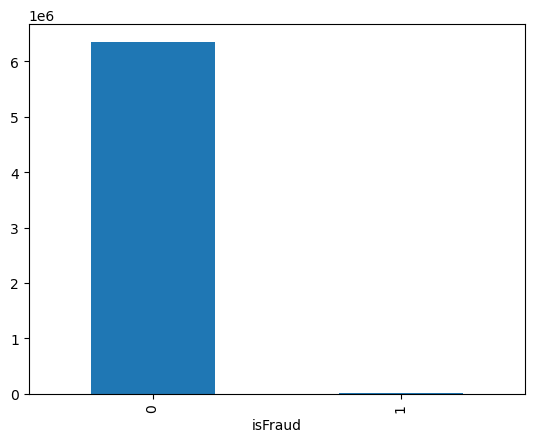

In [8]:
# Count Fraud 
fraud_count = financial_df["isFraud"].value_counts().plot.bar()

fraud_count

In [24]:
# Which type of transcations are fraud
type_fraud = fraud["type"].value_counts().to_frame()

type_fraud

,count
type,
CASH_OUT,4116
TRANSFER,4097


In [38]:
type_notfraud = notfraud["type"].value_counts().to_frame()

type_notfraud

,count
type,
CASH_OUT,2233384
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,528812
DEBIT,41432


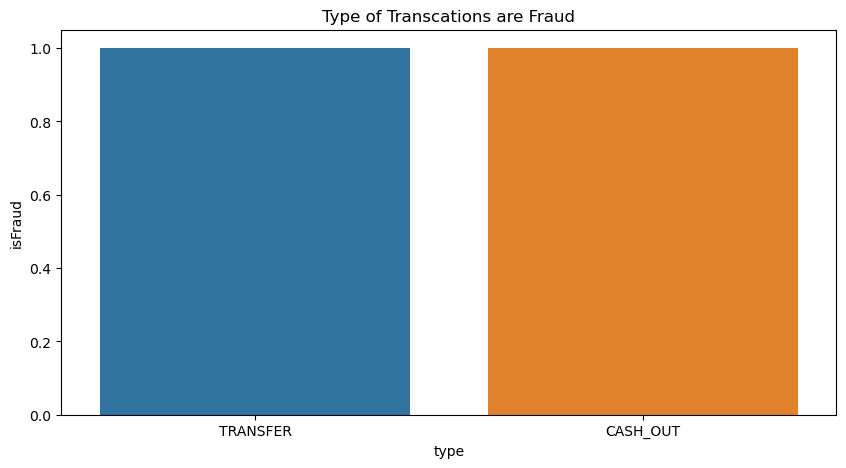

In [34]:
# Which type of transcations are fraud

plt.figure(figsize=(10, 5))
sns.barplot(data=fraud, x="type", y="isFraud", hue="type")
plt.title("Type of Transcations are Fraud")
plt.show()